In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [15]:
df = pd.read_csv("data.csv")

In [16]:
df = df.dropna()

In [19]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       0 non-null      int64  
 1   diagnosis                0 non-null      object 
 2   radius_mean              0 non-null      float64
 3   texture_mean             0 non-null      float64
 4   perimeter_mean           0 non-null      float64
 5   area_mean                0 non-null      float64
 6   smoothness_mean          0 non-null      float64
 7   compactness_mean         0 non-null      float64
 8   concavity_mean           0 non-null      float64
 9   concave points_mean      0 non-null      float64
 10  symmetry_mean            0 non-null      float64
 11  fractal_dimension_mean   0 non-null      float64
 12  radius_se                0 non-null      float64
 13  texture_se               0 non-null      float64
 14  perimeter_se             0 non-null      fl

In [20]:
X = df.drop('diagnosis', axis=1)  
y = df['radius_worst']

In [24]:
import pandas as pd
df = pd.read_csv("data.csv", skiprows=1)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.dropna(inplace=True)
print(df.head())
print(df.shape)



     842302  M  17.99  10.38   122.8    1001   0.1184   0.2776  0.3001  \
0    842517  M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869   
1  84300903  M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974   
2  84348301  M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414   
3  84358402  M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980   
4    843786  M  12.45  15.70   82.57   477.1  0.12780  0.17000  0.1578   

    0.1471  ...  25.38  17.33   184.6    2019  0.1622  0.6656  0.7119  0.2654  \
0  0.07017  ...  24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416  0.1860   
1  0.12790  ...  23.57  25.53  152.50  1709.0  0.1444  0.4245  0.4504  0.2430   
2  0.10520  ...  14.91  26.50   98.87   567.7  0.2098  0.8663  0.6869  0.2575   
3  0.10430  ...  22.54  16.67  152.20  1575.0  0.1374  0.2050  0.4000  0.1625   
4  0.08089  ...  15.47  23.75  103.40   741.6  0.1791  0.5249  0.5355  0.1741   

   0.4601   0.1189  
0  0.2750  0.08902  
1  0.3613  0.08758  
2  0.

In [25]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, 2:] 
y = df.iloc[:, 1]   


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)


Training set: (454, 30)
Testing set: (114, 30)


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
model = LogisticRegression()
model.fit(X_train, y_train)


C:\Users\ancye\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [28]:
y_pred = model.predict(X_test)


In [29]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9122807017543859

Confusion Matrix:
 [[66  2]
 [ 8 38]]

Classification Report:
               precision    recall  f1-score   support

           B       0.89      0.97      0.93        68
           M       0.95      0.83      0.88        46

    accuracy                           0.91       114
   macro avg       0.92      0.90      0.91       114
weighted avg       0.92      0.91      0.91       114



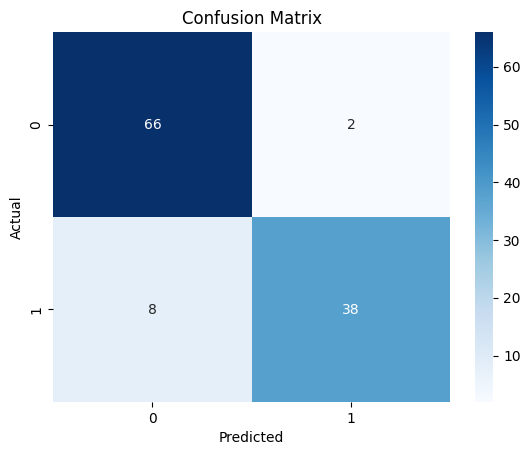

In [30]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()